### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

set index_col =0 to use the first column as the index

In [2]:
df = pd.read_csv('Classified Data', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis =1 ))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [8]:
df_features = pd.DataFrame( scaled_features, columns = df.columns[:-1])

In [9]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split( scaled_features, df['TARGET CLASS'], test_size=0.30)

## Using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [15]:
pred = knn.predict(xtest)

## Predictions and Evaluations 

We are using confusion matrix and Classification Report 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(ytest, pred))

[[146  11]
 [  8 135]]


In [18]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       157
           1       0.92      0.94      0.93       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [19]:
import seaborn as sns

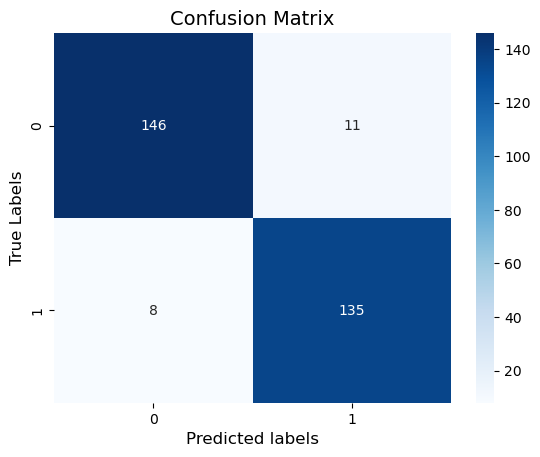

In [20]:
sns.heatmap(confusion_matrix(ytest, pred), annot = True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted labels', fontsize = 12)
plt.ylabel('True Labels', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

## Choosing a K value

We can either use error rate or accuracy score to find the optimal k value

##### 1. Error Rate Method

In [21]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier( n_neighbors = i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append( np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

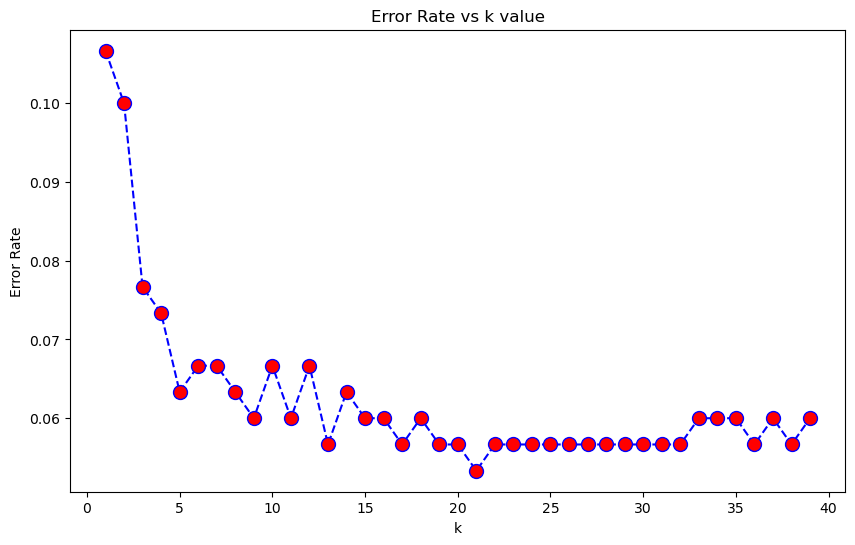

In [22]:
plt.figure(figsize=(10,6))
plt.plot( range(1,40), error_rate, color ='blue', linestyle ='dashed', marker='o',markerfacecolor ='red', markersize = 10)
plt.title('Error Rate vs k value')
plt.xlabel('k')
plt.ylabel('Error Rate')

k =22 or 24

#### 2. Score 

In [23]:
k_range = range(1,40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    pred_k = knn.predict(xtest)
    scores.append(knn.score(xtest, ytest))

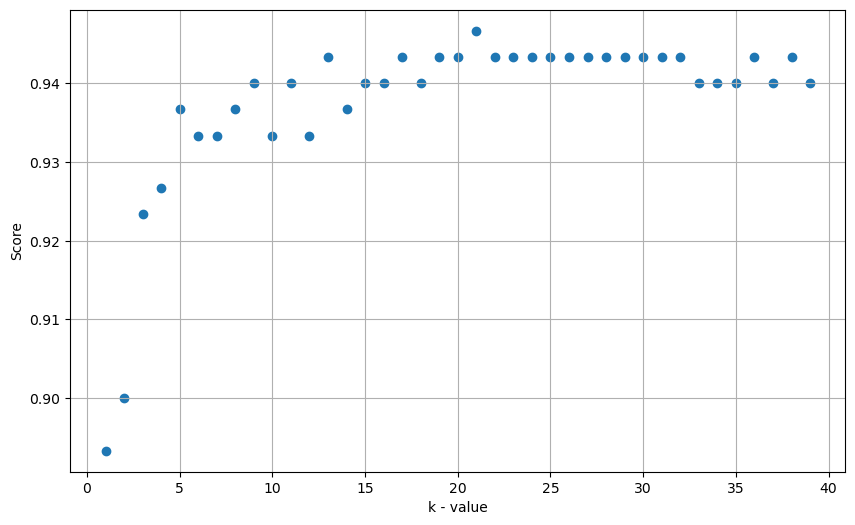

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel('k - value')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.grid()
plt.show()

k = 21

In [25]:
knn = KNeighborsClassifier( n_neighbors = 21 )
knn.fit(xtrain, ytrain)
pred_21 = knn.predict(xtest)
print(confusion_matrix(ytest, pred_21))
print(classification_report(ytest, pred_21))

[[146  11]
 [  5 138]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       157
           1       0.93      0.97      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



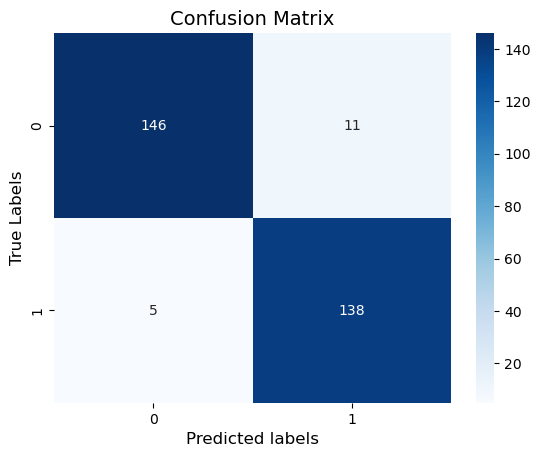

In [26]:
sns.heatmap(confusion_matrix(ytest, pred_21), annot = True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted labels', fontsize = 12)
plt.ylabel('True Labels', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

k = 22

In [27]:
knn = KNeighborsClassifier( n_neighbors = 22)
knn.fit(xtrain, ytrain)
pred_22 = knn.predict(xtest)
print(confusion_matrix(ytest, pred_22))
print(classification_report(ytest, pred_22))

[[146  11]
 [  6 137]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       157
           1       0.93      0.96      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



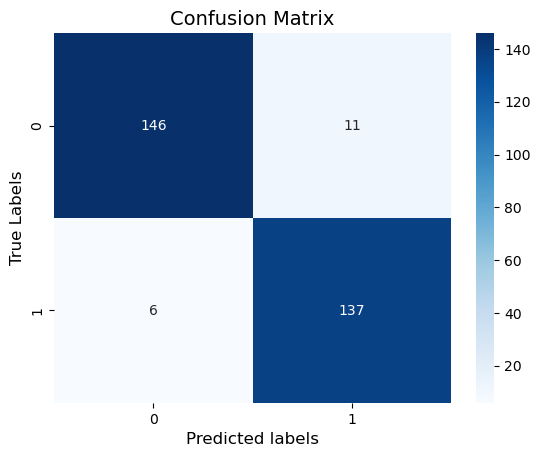

In [28]:
sns.heatmap(confusion_matrix(ytest, pred_22), annot = True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted labels', fontsize = 12)
plt.ylabel('True Labels', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

k = 24

In [29]:
knn = KNeighborsClassifier( n_neighbors = 24)
knn.fit(xtrain, ytrain)
pred_24 = knn.predict(xtest)
print(confusion_matrix(ytest, pred_24))
print(classification_report(ytest, pred_24))

[[146  11]
 [  6 137]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       157
           1       0.93      0.96      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



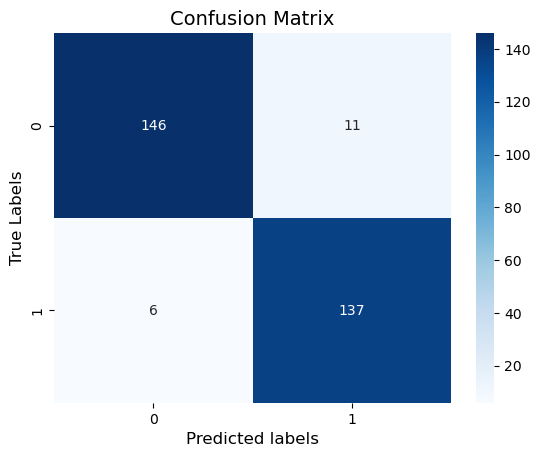

In [30]:
sns.heatmap(confusion_matrix(ytest, pred_24), annot = True, fmt='d', cmap= 'Blues')
plt.xlabel('Predicted labels', fontsize = 12)
plt.ylabel('True Labels', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

Combining all the data into dataFrame and use multi indexing to compare and contrast in a single DataFrame

to convert into a data frame, the ouput should be in the dictionary form

In [31]:
report_5 = classification_report(ytest, pred, output_dict = True)
report_21 = classification_report(ytest, pred, output_dict = True)
report_22 = classification_report(ytest, pred_22, output_dict = True)
report_24 = classification_report(ytest, pred_24, output_dict = True)

In [32]:
print(report_5)

{'0': {'precision': 0.948051948051948, 'recall': 0.9299363057324841, 'f1-score': 0.9389067524115756, 'support': 157.0}, '1': {'precision': 0.9246575342465754, 'recall': 0.9440559440559441, 'f1-score': 0.9342560553633218, 'support': 143.0}, 'accuracy': 0.9366666666666666, 'macro avg': {'precision': 0.9363547411492616, 'recall': 0.936996124894214, 'f1-score': 0.9365814038874487, 'support': 300.0}, 'weighted avg': {'precision': 0.9369006108047203, 'recall': 0.9366666666666666, 'f1-score': 0.936689920151908, 'support': 300.0}}


In [33]:
df_5 = pd.DataFrame(report_5)
df_21 = pd.DataFrame(report_21).transpose()
df_22 = pd.DataFrame(report_22).transpose()
df_24  = pd.DataFrame(report_24).transpose()

In [34]:
df_5

,0,1,accuracy,macro avg,weighted avg
precision,0.948052,0.924658,0.936667,0.936355,0.936901
recall,0.929936,0.944056,0.936667,0.936996,0.936667
f1-score,0.938907,0.934256,0.936667,0.936581,0.936690
support,157.000000,143.000000,0.936667,300.000000,300.000000


In [35]:
df_5.transpose()

,precision,recall,f1-score,support
0,0.948052,0.929936,0.938907,157.000000
1,0.924658,0.944056,0.934256,143.000000
accuracy,0.936667,0.936667,0.936667,0.936667
macro avg,0.936355,0.936996,0.936581,300.000000
weighted avg,0.936901,0.936667,0.936690,300.000000


In [36]:
df_5 = pd.DataFrame(report_5).transpose()

Using Multi Indexing to add a level to the Index for Each Report 

In [37]:
df_5.index = pd.MultiIndex.from_product([['pred'], df_5.index])

In [38]:
df_5

precision    recall  f1-score     support
pred 0              0.948052  0.929936  0.938907  157.000000
     1              0.924658  0.944056  0.934256  143.000000
     accuracy       0.936667  0.936667  0.936667    0.936667
     macro avg      0.936355  0.936996  0.936581  300.000000
     weighted avg   0.936901  0.936667  0.936690  300.000000

In [39]:
df_5.index = pd.MultiIndex.from_tuples([(5,0),(5,1),(5,'accuraccy'),(5,'macro avg'),(5,'weighted avg')], names = ['k - value', 'metrics'])

In [40]:
df_5.index

MultiIndex([(5,              0),
            (5,              1),
            (5,    'accuraccy'),
            (5,    'macro avg'),
            (5, 'weighted avg')],
           names=['k - value', 'metrics'])

In [41]:
df_5

precision    recall  f1-score     support
k - value metrics                                                
5         0              0.948052  0.929936  0.938907  157.000000
          1              0.924658  0.944056  0.934256  143.000000
          accuraccy      0.936667  0.936667  0.936667    0.936667
          macro avg      0.936355  0.936996  0.936581  300.000000
          weighted avg   0.936901  0.936667  0.936690  300.000000

In [42]:
df_21.index = pd.MultiIndex.from_product([['21'], df_21.index], names = ['k - value', 'metrics'])

In [43]:
df_21.index

MultiIndex([('21',            '0'),
            ('21',            '1'),
            ('21',     'accuracy'),
            ('21',    'macro avg'),
            ('21', 'weighted avg')],
           names=['k - value', 'metrics'])

In [44]:
df_21

precision    recall  f1-score     support
k - value metrics                                                
21        0              0.948052  0.929936  0.938907  157.000000
          1              0.924658  0.944056  0.934256  143.000000
          accuracy       0.936667  0.936667  0.936667    0.936667
          macro avg      0.936355  0.936996  0.936581  300.000000
          weighted avg   0.936901  0.936667  0.936690  300.000000

In [45]:
df_22.index = pd.MultiIndex.from_product([['22'], df_22.index], names = ['k - value','metrics'])

In [46]:
df_22.index

MultiIndex([('22',            '0'),
            ('22',            '1'),
            ('22',     'accuracy'),
            ('22',    'macro avg'),
            ('22', 'weighted avg')],
           names=['k - value', 'metrics'])

In [47]:
df_22

precision    recall  f1-score     support
k - value metrics                                                
22        0              0.960526  0.929936  0.944984  157.000000
          1              0.925676  0.958042  0.941581  143.000000
          accuracy       0.943333  0.943333  0.943333    0.943333
          macro avg      0.943101  0.943989  0.943282  300.000000
          weighted avg   0.943914  0.943333  0.943362  300.000000

In [48]:
df_24.index = pd.MultiIndex.from_tuples([(24, metric) for metric in df_24.index], names = ['k - value','metrics'])

In [49]:
df_24.index

MultiIndex([(24,            '0'),
            (24,            '1'),
            (24,     'accuracy'),
            (24,    'macro avg'),
            (24, 'weighted avg')],
           names=['k - value', 'metrics'])

In [50]:
df_24

precision    recall  f1-score     support
k - value metrics                                                
24        0              0.960526  0.929936  0.944984  157.000000
          1              0.925676  0.958042  0.941581  143.000000
          accuracy       0.943333  0.943333  0.943333    0.943333
          macro avg      0.943101  0.943989  0.943282  300.000000
          weighted avg   0.943914  0.943333  0.943362  300.000000

In [51]:
combined_cr = pd.concat([df_5, df_21, df_22, df_24])

In [52]:
combined_cr

precision    recall  f1-score     support
k - value metrics                                                
5         0              0.948052  0.929936  0.938907  157.000000
          1              0.924658  0.944056  0.934256  143.000000
          accuraccy      0.936667  0.936667  0.936667    0.936667
          macro avg      0.936355  0.936996  0.936581  300.000000
          weighted avg   0.936901  0.936667  0.936690  300.000000
21        0              0.948052  0.929936  0.938907  157.000000
          1              0.924658  0.944056  0.934256  143.000000
          accuracy       0.936667  0.936667  0.936667    0.936667
          macro avg      0.936355  0.936996  0.936581  300.000000
          weighted avg   0.936901  0.936667  0.936690  300.000000
22        0              0.960526  0.929936  0.944984  157.000000
          1              0.925676  0.958042  0.941581  143.000000
          accuracy       0.943333  0.943333  0.943333    0.943333
          macro avg      0.943101  0.943989  0.943282  300.000000
          weighted avg   0.943914  0.943333  0.943362  300.000000
24        0              0.960526  0.929936  0.944984  157.000000
          1              0.925676  0.958042  0.941581  143.000000
          accuracy       0.943333  0.943333  0.943333    0.943333
          macro avg      0.943101  0.943989  0.943282  300.000000
          weighted avg   0.943914  0.943333  0.943362  300.000000